<a href="https://colab.research.google.com/github/NaigaVivian/NaigaVivian/blob/main/NAIGA_VIVIAN_AI_experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install torch

In [12]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.1 MB/s eta 0:00:00


In [13]:
from torch_geometric.datasets import Planetoid
cora = Planetoid(root='./data', name='Cora')[0]
print(cora)

import torch
from torch import nn
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch.optim import Adam

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [ ]:
3

In [15]:
class GCN(nn.Module):
  def __init__(self, in_channels, hidden_channels, class_n):
    super(GCN, self).__init__()
    self.conv1 = GCNConv(in_channels, hidden_channels)
    self.conv2 = GCNConv(hidden_channels, class_n)

  def forward(self, x, edge_index):
    x = torch.relu(self.conv1(x, edge_index))
    x = torch.dropout(x, p=0.5, train=self.training)
    x = self.conv2(x, edge_index)
    return torch.log_softmax(x, dim=1)

In [16]:
model = GCN(cora.num_features, 16, cora.y.unique().shape[0])
opt = Adam(model.parameters(), 0.01, weight_decay=5e-4)


In [17]:
def train(its):
  model.train()
  for i in range(its):
    y = model(cora.x, cora.edge_index)
    loss = F.nll_loss(y[cora.train_mask], cora.y[cora.train_mask])
    loss.backward()
    opt.step()
    opt.zero_grad()

In [18]:
def test():
  model.eval()
  y = model(cora.x, cora.edge_index)
  right_n = torch.argmax(y[cora.test_mask], 1) == cora.y[cora.test_mask]
  acc = right_n.sum()/cora.test_mask.sum()
  print("Acc: ", acc)

In [19]:
def main():
  for i in range(10):
    train(1)
    test()
if __name__ == '__main__':
    main()

Acc:  tensor(0.3310)
Acc:  tensor(0.4480)
Acc:  tensor(0.4430)
Acc:  tensor(0.4180)
Acc:  tensor(0.4500)
Acc:  tensor(0.5230)
Acc:  tensor(0.6000)
Acc:  tensor(0.6410)
Acc:  tensor(0.6940)
Acc:  tensor(0.7260)


In [37]:
from torch_geometric.nn import SAGEConv
class GraphSAGE(nn.Module):
  def __init__(self, in_channels, hidden_channels, class_n):
      super(GraphSAGE, self).__init__()
      self.conv1 = SAGEConv(in_channels, hidden_channels)
      self.conv2 = SAGEConv(hidden_channels, hidden_channels)
      self.conv3 = SAGEConv(hidden_channels, class_n)
  def forward (self, x, edge_index):
      x = F.relu(self.conv1(x, edge_index))
      x = F.dropout(x,
      p=0.5, training=self.training)
      x = self. conv2(x, edge_index)
      x = F. dropout(x, p=0.5, training=self.training)
      x = self.conv3(x, edge_index)
      return F.log_softmax(x, dim=1)

In [38]:
model = GraphSAGE(cora.num_features, 24, cora.y.unique().shape[0])
opt = Adam(model.parameters(), 0.01, weight_decay=5e-4)

In [39]:
def train(its):
    model.train()
    for i in range(its):
        # Forward pass
        y = model(cora.x, cora.edge_index)
        # Calculate loss using negative log-likelihood loss
        loss = F.nll_loss(y[cora.train_mask], cora.y[cora.train_mask])
        # Backpropagation
        loss.backward()
        opt.step()
        opt.zero_grad()

In [40]:
def test():
    model.eval()
    y = model(cora.x, cora.edge_index)
    # Calculate accuracy on the test set
    right_n = torch.argmax(y[cora.test_mask], 1) == cora.y[cora.test_mask]
    acc = right_n.sum()/cora.test_mask.sum()
    print("Acc: ", acc)

In [41]:
def main():
    for i in range(10):
        train(1)  # Train for 1 iteration
        test()    # Test after each training iteration

# Run the main function
if __name__ == '__main__':
    main()

Acc:  tensor(0.4000)
Acc:  tensor(0.4310)
Acc:  tensor(0.5810)
Acc:  tensor(0.6860)
Acc:  tensor(0.7100)
Acc:  tensor(0.7400)
Acc:  tensor(0.7690)
Acc:  tensor(0.7890)
Acc:  tensor(0.8030)
Acc:  tensor(0.7870)


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Training GCN Model...
Epoch 1/10, Loss: 1.9632, Test Accuracy: 0.3590
Epoch 2/10, Loss: 1.8757, Test Accuracy: 0.4630
Epoch 3/10, Loss: 1.7770, Test Accuracy: 0.4680
Epoch 4/10, Loss: 1.6612, Test Accuracy: 0.4570
Epoch 5/10, Loss: 1.4955, Test Accuracy: 0.4700
Epoch 6/10, Loss: 1.3833, Test Accuracy: 0.4930
Epoch 7/10, Loss: 1.2763, Test Accuracy: 0.5290
Epoch 8/10, Loss: 1.1609, Test Accuracy: 0.5740
Epoch 9/10, Loss: 1.0384, Test Accuracy: 0.6120
Epoch 10/10, Loss: 0.9594, Test Accuracy: 0.6460

Training GraphSAGE Model...
Epoch 1/10, Loss: 1.9547, Test Accuracy: 0.4350
Epoch 2/10, Loss: 1.7928, Test Accuracy: 0.5010
Epoch 3/10, Loss: 1.5773, Test Accuracy: 0.5300
Epoch 4/10, Loss: 1.3776, Test Accuracy: 0.5670
Epoch 5/10, Loss: 1.1791, Test Accuracy: 0.6230
Epoch 6/10, Loss: 0.9630, Test Accuracy: 0.6580
Epoch 7/10, Loss: 0.8365, Test Accuracy: 0.6790
Epoch 8/10, Loss: 0.6983

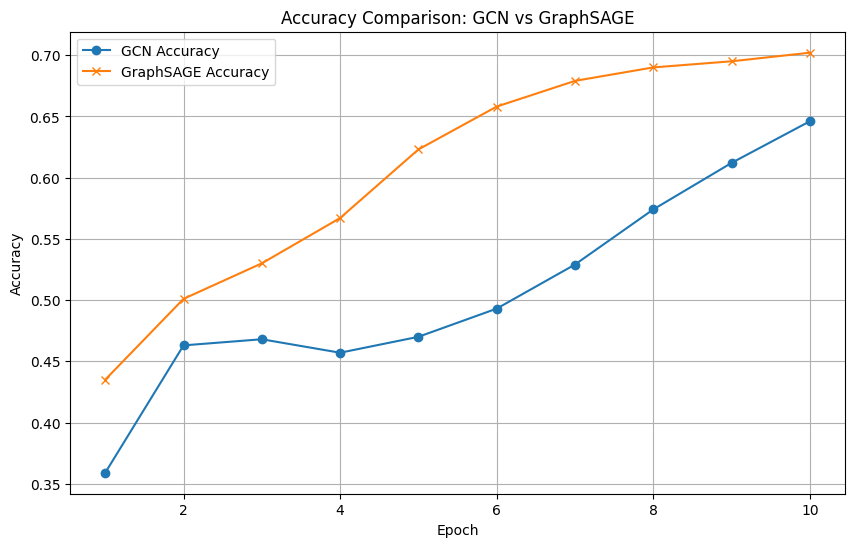

In [53]:
import torch
import matplotlib.pyplot as plt
from torch_geometric.datasets import Planetoid
import torch.nn.functional as F
from torch.optim import Adam
from torch_geometric.nn import GCNConv, SAGEConv
from torch import nn

# Load the Cora dataset
cora = Planetoid(root='./data', name='Cora')[0]
print(cora)

# Define the GCN model
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, class_n):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, class_n)

    def forward(self, x, edge_index):
        x = torch.relu(self.conv1(x, edge_index))
        x = torch.dropout(x, p=0.5, train=self.training)
        x = self.conv2(x, edge_index)
        return torch.log_softmax(x, dim=1)

# Define the GraphSAGE model
class GraphSAGE(nn.Module):
    def __init__(self, in_channels, hidden_channels, class_n):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, class_n)

    def forward(self, x, edge_index):
        x = torch.relu(self.conv1(x, edge_index))
        x = torch.dropout(x, p=0.5, train=self.training)
        x = self.conv2(x, edge_index)
        return torch.log_softmax(x, dim=1)

# Function to train the model
def train(model, optimizer, dataset, mask, num_epochs=10):
    accuracies = []
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        out = model(dataset.x, dataset.edge_index)
        loss = F.nll_loss(out[mask], dataset.y[mask])
        loss.backward()
        optimizer.step()

        # Testing
        model.eval()
        out = model(dataset.x, dataset.edge_index)
        pred = out.argmax(dim=1)
        correct = pred[dataset.test_mask] == dataset.y[dataset.test_mask]
        acc = correct.sum().item() / dataset.test_mask.sum().item()
        accuracies.append(acc)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Test Accuracy: {acc:.4f}")
    return accuracies

# Function to plot accuracy graph
def plot_accuracy(gcn_acc, graphsage_acc):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(gcn_acc) + 1), gcn_acc, label='GCN Accuracy', marker='o')
    plt.plot(range(1, len(graphsage_acc) + 1), graphsage_acc, label='GraphSAGE Accuracy', marker='x')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison: GCN vs GraphSAGE')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to train and compare both models
def main():
    # Initialize both models
    gcn_model = GCN(cora.num_features, 16, cora.y.unique().shape[0])
    graphsage_model = GraphSAGE(cora.num_features, 16, cora.y.unique().shape[0])

    # Initialize optimizers
    gcn_optimizer = Adam(gcn_model.parameters(), lr=0.01, weight_decay=5e-4)
    graphsage_optimizer = Adam(graphsage_model.parameters(), lr=0.01, weight_decay=5e-4)

    # Train both models and get accuracy history
    print("Training GCN Model...")
    gcn_accuracy = train(gcn_model, gcn_optimizer, cora, cora.train_mask, num_epochs=10)

    print("\nTraining GraphSAGE Model...")
    graphsage_accuracy = train(graphsage_model, graphsage_optimizer, cora, cora.train_mask, num_epochs=10)

    # Plot accuracy comparison
    plot_accuracy(gcn_accuracy, graphsage_accuracy)

if __name__ == '__main__':
    main()